In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
data = pd.read_csv('data.csv')

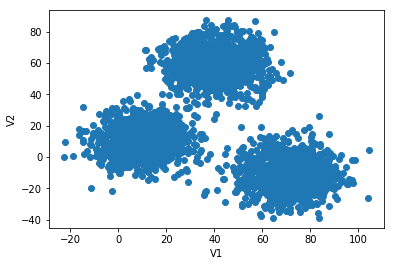

In [33]:
plt.scatter(data['V1'],data['V2'])
plt.ylabel('V2')
plt.xlabel('V1')
plt.show()
#data.V1

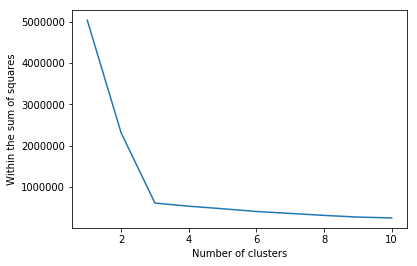

In [10]:
#from the above there seems to be three clusters
wss = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data['Clusters'] = kmeans.labels_
    #print(data['Clusters'])
    wss[k]=kmeans.inertia_
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Within the sum of squares")
plt.show() 

In [16]:
from scipy.spatial.distance import cdist
import numpy as np

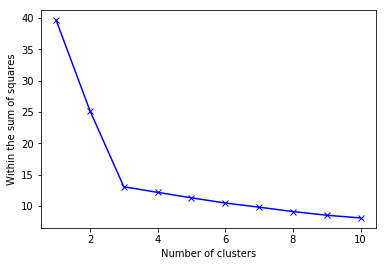

In [17]:
wss = []
myrange = range(1,11)
for k in myrange:
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    wss.append(sum(np.min(cdist(data,kmeans.cluster_centers_,'euclidean'),axis=1))/data.shape[0])   
    #data['Clusters'] = kmeans.labels_
    #print(data['Clusters'])
plt.plot(myrange,wss,'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("Within the sum of squares")
plt.show()     

In [39]:
#from the plot above most suitable number of clusters is 3
kmeans = KMeans(n_clusters=3,init = 'k-means++', random_state = 42).fit(data)
values =data[['V1','V2']].values
print(values)

[[  2.072345  -3.241693]
 [ 17.93671   15.78481 ]
 [  1.083576   7.319176]
 ...
 [ 64.46532  -10.50136 ]
 [ 90.72282  -12.25584 ]
 [ 64.87976  -24.87731 ]]


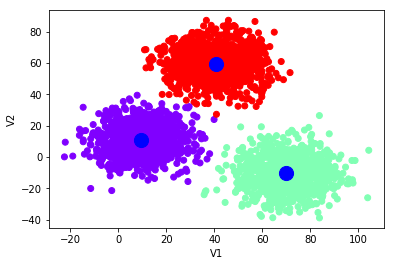

In [41]:
plt.scatter(values[:,0],values[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'blue', label = 'Centroids')
plt.ylabel('V2')
plt.xlabel('V1')
plt.show()